In [84]:
import os, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50

SEED = 778
np.random.seed(SEED)

In [85]:
path = '/home/brut0/Projects/Leaders of Digital 2021/Task 2 - lost airplanes/'
labels_train = pd.read_csv(path+'train.csv')
labels_test = pd.read_csv(path+'test_extended.csv')
submission = pd.read_csv(path+'sample_submission_extended.csv')

In [86]:
print('train len: ', labels_train.shape)
print('test ext len: ', labels_test.shape)
print('sub len: ', submission.shape)

train len:  (31080, 2)
test ext len:  (101000, 1)
sub len:  (101000, 2)


CPU times: user 13.1 ms, sys: 796 µs, total: 13.9 ms
Wall time: 11.7 ms


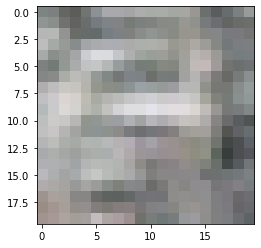

In [87]:
%%time
plt.imshow(load_img(path+'avia-test-extended/'+labels_test['filename'][0]+'.png'))

In [88]:
labels_train['filename'] = labels_train['filename'].apply(lambda x: x+'.png')
labels_test.loc[:999, 'filename'] = labels_test.loc[:999, 'filename'].apply(lambda x: x+'.png')
labels_test.loc[1000:, 'filename'] = labels_test.loc[1000:, 'filename'].apply(lambda x: x+'.jpeg')

In [89]:
def load_train(path):
    train_datagen = ImageDataGenerator(rescale=1/255.,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       zoom_range=0.20,
                                       width_shift_range=0.15,
                                       validation_split=0.25)

    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels_train,
        directory=path+'avia-train/',
        x_col='filename',
        y_col='sign',
        class_mode='raw',
        target_size=(20, 20),
        batch_size=16,
        subset='training',
        seed=SEED)

    return train_datagen_flow


def load_valid(path):
    train_datagen = ImageDataGenerator(rescale=1/255.,
                                       validation_split=0.25)

    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels_train,
        directory=path+'avia-train/',
        x_col='filename',
        y_col='sign',
        class_mode='raw',
        target_size=(20, 20),
        batch_size=16,
        subset='validation',
        seed=SEED)

    return train_datagen_flow


def load_test(path):
    test_datagen = ImageDataGenerator(rescale=1/255.)

    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels_test,
        directory=path+'avia-test-extended/',
        x_col='filename',
        y_col=None,
        class_mode=None,
        target_size=(20,20),
        shuffle=False, # TEST IT WHEN GENERATE SUBMISSION or use generator.filename
        batch_size=1,
        seed=SEED)

    return test_datagen_flow

In [ ]:
# custom from top of kaggle (reduce filters and size)
# Epoch 28/1000
# 1359/1359 [==============================] - 114s 84ms/step - loss: 0.0267 - binary_accuracy: 0.9911 - val_loss: 0.0503 - val_binary_accuracy: 0.9854
# 0.994 on public board
def create_model(input_shape):

    model = Sequential()    
    model.add(Conv2D(filters=16, kernel_size=(4, 4), padding='same',
                     activation="relu", input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=(4, 4),
                     activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=32, kernel_size=(4, 4), padding='same',
                     activation="relu", input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=(4, 4),
                     activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.0005) # !!! big
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

    return model

In [90]:
# custom from top of kaggle (reduce filters and size)
# Epoch 88/1000
# 1456/1456 [==============================] - 97s 66ms/step - loss: 0.0683 - binary_accuracy: 0.9757 - val_loss: 0.0605 - val_binary_accuracy: 0.9781
# BEST 0.9986
def create_model(input_shape):

    model = Sequential()    
    model.add(Conv2D(filters=32, kernel_size=(2, 2), padding='same',
                     activation="relu", input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=(4, 4),
                     activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=32, kernel_size=(4, 4), padding='same',
                     activation="relu", input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=(4, 4),
                     activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.00005) # !!! big
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

    return model

In [122]:
# custom from top of kaggle (reduce filters and size)
#1456/1456 [==============================] - 76s 52ms/step - loss: 0.0815 - binary_accuracy: 0.9696 - val_loss: 0.0581 - val_binary_accuracy: 0.9795
def create_model(input_shape):

    model = Sequential()    
    model.add(Conv2D(filters=32, kernel_size=(2, 2), padding='same',
                     activation="relu", input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=(4, 4),
                     activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64, kernel_size=(4, 4), padding='same',
                     activation="relu", input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=(4, 4),
                     activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.00002) # !!! big
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

    return model

In [46]:
# custom from top of kaggle (reduce size)
# Epoch 67/1000
# 1359/1359 [==============================] - 117s 86ms/step - loss: 0.0094 - binary_accuracy: 0.9971 - val_loss: 0.0575 - val_binary_accuracy: 0.9855
# 0.997 on public board
def create_model(input_shape):

    model = Sequential()    
    model.add(Conv2D(filters=32, kernel_size=(4, 4), padding='same',
                     activation="relu", input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=(4, 4),
                     activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64, kernel_size=(4, 4), padding='same',
                     activation="relu", input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=(4, 4),
                     activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.00005)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

    return model

In [ ]:
# custom from top of kaggle (reduce size and increase dense)
# Epoch 48/1000
# 1359/1359 [==============================] - 160s 118ms/step - loss: 0.0118 - binary_accuracy: 0.9953 - val_loss: 0.0489 - val_binary_accuracy: 0.9882
# 0.997 on public board
def create_model(input_shape):

    model = Sequential()    
    model.add(Conv2D(filters=32, kernel_size=(4, 4), padding='same',
                     activation="relu", input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=(4, 4),
                     activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64, kernel_size=(4, 4), padding='same',
                     activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=(4, 4),
                     activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.00001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

    return model

In [8]:
# custom from top of kaggle (reduce size and increase dense)
# USE IT FOR SUBMISSION
# Epoch 151/1000
# 1359/1359 [==============================] - 79s 58ms/step - loss: 0.0539 - binary_accuracy: 0.9799 - val_loss: 0.0497 - val_binary_accuracy: 0.9822
def create_model(input_shape):

    model = Sequential()    
    model.add(Conv2D(filters=32, kernel_size=(4, 4), padding='same',
                     activation="relu", input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=(4, 4),
                     activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64, kernel_size=(4, 4), padding='same',
                     activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=(4, 4),
                     activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.00001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

    return model

In [67]:
# custom from top of kaggle (reduce size and increase dense + batch norm)
# Epoch 63/1000
# 1456/1456 [==============================] - 105s 72ms/step - loss: 0.0266 - binary_accuracy: 0.9901 - val_loss: 0.0378 - val_binary_accuracy: 0.9878
from keras.layers.normalization import BatchNormalization

def create_model(input_shape):

    model = Sequential()    
    model.add(Conv2D(filters=32, kernel_size=(4, 4), padding='same',
                     activation="relu", input_shape=input_shape))
    BatchNormalization(axis=1)
    model.add(Conv2D(filters=32, kernel_size=(4, 4),
                     activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    BatchNormalization(axis=1)
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64, kernel_size=(4, 4), padding='same',
                     activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=(4, 4),
                     activation="relu"))
    BatchNormalization(axis=1)
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    BatchNormalization(axis=1)
    model.add(Dense(1024, activation='relu'))
    BatchNormalization(axis=1)
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.00003)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

    return model

In [123]:
def train_model(model, generator, valid_generator, 
                batch_size=32, epochs=1000,
                steps_per_epoch=None, validation_steps=None, early_stopping=None):

    model.fit(train_generator,
                validation_data=valid_generator,
                batch_size=batch_size,
                epochs=epochs,
                steps_per_epoch=steps_per_epoch,
                validation_steps=validation_steps,
                verbose=1,
                shuffle=True,
                callbacks=[early_stopping])

    return model 

In [124]:
def FindBatchSize(model):
    """model: model architecture, that is yet to be trained"""
    import os, sys, psutil, gc, tensorflow, keras
    import numpy as np
    from keras import backend as K
    BatchFound= 16

    try:
        total_params= int(model.count_params());    GCPU= "CPU"
        #find whether gpu is available
        try:
            if K.tensorflow_backend._get_available_gpus()== []:
                GCPU= "CPU";    #CPU and Cuda9GPU
            else:
                GCPU= "GPU"
        except:
            from tensorflow.python.client import device_lib;    #Cuda8GPU
            def get_available_gpus():
                local_device_protos= device_lib.list_local_devices()
                return [x.name for x in local_device_protos if x.device_type == 'GPU']
            if "gpu" not in str(get_available_gpus()).lower():
                GCPU= "CPU"
            else:
                GCPU= "GPU"

        #decide batch size on the basis of GPU availability and model complexity
        if (GCPU== "GPU") and (os.cpu_count() >15) and (total_params <1000000):
            BatchFound= 64    
        if (os.cpu_count() <16) and (total_params <500000):
            BatchFound= 64  
        if (GCPU== "GPU") and (os.cpu_count() >15) and (total_params <2000000) and (total_params >=1000000):
            BatchFound= 32      
        if (GCPU== "GPU") and (os.cpu_count() >15) and (total_params >=2000000) and (total_params <10000000):
            BatchFound= 16  
        if (GCPU== "GPU") and (os.cpu_count() >15) and (total_params >=10000000):
            BatchFound= 8       
        if (os.cpu_count() <16) and (total_params >5000000):
            BatchFound= 8    
        if total_params >100000000:
            BatchFound= 1

    except:
        pass
    try:

        #find percentage of memory used
        memoryused= psutil.virtual_memory()
        memoryused= float(str(memoryused).replace(" ", "").split("percent=")[1].split(",")[0])
        if memoryused >75.0:
            BatchFound= 8
        if memoryused >85.0:
            BatchFound= 4
        if memoryused >90.0:
            BatchFound= 2
        if total_params >100000000:
            BatchFound= 1
        print("Batch Size:  "+str(BatchFound)+' GCPU:'+GCPU);    gc.collect()
    except:
        pass

    memoryused= [];    total_params= [];    GCPU= "";
    del memoryused, total_params, GCPU;    gc.collect()
    return BatchFound

In [125]:
model = create_model((20,20,3))

In [126]:
batch_size = FindBatchSize(model)

Batch Size:  8 GCPU:CPU


In [112]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_binary_accuracy', 
    patience=10,
    min_delta=0.001, 
    mode='max'
)

In [127]:
%%time

train_generator = load_train(path)
valid_generator = load_valid(path)
#   test_generator = load_test(path)


STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

history_model = train_model(model,
                            train_generator, valid_generator,
                            #batch_size=batch_size,
                            batch_size=16,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_steps=STEP_SIZE_VALID,
                            early_stopping=early_stopping)

Found 23310 validated image filenames.
Found 7770 validated image filenames.
Epoch 1/1000
1456/1456 [==============================] - 79s 54ms/step - loss: 0.5852 - binary_accuracy: 0.7440 - val_loss: 0.4982 - val_binary_accuracy: 0.7461
Epoch 2/1000
1456/1456 [==============================] - 66s 46ms/step - loss: 0.4469 - binary_accuracy: 0.7727 - val_loss: 0.4041 - val_binary_accuracy: 0.8153
Epoch 3/1000
1456/1456 [==============================] - 78s 54ms/step - loss: 0.3585 - binary_accuracy: 0.8386 - val_loss: 0.2837 - val_binary_accuracy: 0.8836
Epoch 4/1000
1456/1456 [==============================] - 82s 56ms/step - loss: 0.3242 - binary_accuracy: 0.8546 - val_loss: 0.2915 - val_binary_accuracy: 0.8749
Epoch 5/1000
1456/1456 [==============================] - 81s 56ms/step - loss: 0.2975 - binary_accuracy: 0.8689 - val_loss: 0.2528 - val_binary_accuracy: 0.8968
Epoch 6/1000
1456/1456 [==============================] - 81s 56ms/step - loss: 0.2773 - binary_accuracy: 0.8798 

Epoch 51/1000
1456/1456 [==============================] - 76s 52ms/step - loss: 0.1086 - binary_accuracy: 0.9585 - val_loss: 0.0824 - val_binary_accuracy: 0.9714
Epoch 52/1000
1456/1456 [==============================] - 76s 52ms/step - loss: 0.1102 - binary_accuracy: 0.9577 - val_loss: 0.0858 - val_binary_accuracy: 0.9702
Epoch 53/1000
1456/1456 [==============================] - 75s 51ms/step - loss: 0.1057 - binary_accuracy: 0.9602 - val_loss: 0.0779 - val_binary_accuracy: 0.9719
Epoch 54/1000
1456/1456 [==============================] - 76s 52ms/step - loss: 0.1040 - binary_accuracy: 0.9587 - val_loss: 0.0774 - val_binary_accuracy: 0.9741
Epoch 55/1000
1456/1456 [==============================] - 78s 54ms/step - loss: 0.1073 - binary_accuracy: 0.9590 - val_loss: 0.0717 - val_binary_accuracy: 0.9755
Epoch 56/1000
1456/1456 [==============================] - 75s 52ms/step - loss: 0.1027 - binary_accuracy: 0.9603 - val_loss: 0.0906 - val_binary_accuracy: 0.9700
Epoch 57/1000
1456/145

In [74]:
history_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 20, 20, 32)        1568      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 17, 17, 32)        16416     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          32832     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 5, 64)          65600     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 64)         

In [128]:
history_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 20, 20, 32)        416       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 17, 17, 32)        16416     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 64)          32832     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 5, 5, 64)          65600     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 64)         

In [97]:
history_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 20, 20, 32)        416       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 17, 17, 32)        16416     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 32)          16416     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 5, 5, 64)          32832     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 64)         

In [129]:
labels_test = pd.read_csv(path+'test_extended.csv')

In [130]:
def createDataFrame(df, path):
    lst = []
    for i in range(len(df)):
        try:
            img = load_img(path+df['filename'][i]+'.png')
            lst.append(img)
        except:
            try:
                img = load_img(path+df['filename'][i]+'.jpeg')
                lst.append(img)
            except:
                print(i, df['filename'][i])
                lst.append(None)
                continue
    df['pic'] = pd.Series(lst)

In [131]:
%%time

test = labels_test
createDataFrame(test, path+'avia-test-extended/')
test.head()

CPU times: user 4.73 s, sys: 628 ms, total: 5.36 s
Wall time: 5.41 s


,filename,pic
0,68f33844-472b-4111-b600-f90d544833c7,<PIL.PngImagePlugin.PngImageFile image mode=RG...
1,7d93a21d-1f16-49ce-8fcc-edf12c40f549,<PIL.PngImagePlugin.PngImageFile image mode=RG...
2,4a820650-7acd-489a-ad14-9d7ad8c73b6b,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,819b216b-2b6c-4539-a722-70648c0706c6,<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,45f7c47d-03cc-40cd-acc5-b8c1c57872fa,<PIL.PngImagePlugin.PngImageFile image mode=RG...


In [132]:
def prepare_data(data):
    target = data['sign']
    data['array'] = data['pic'].apply(img_to_array)
    features = np.stack(data['array'].to_numpy()) / 255.
    return features, target

In [133]:
test['sign'] = pd.Series(0, index=test.index)
(features_test, target_test) = prepare_data(test)

In [134]:
predicted = model.predict(features_test)
predicted[:10]

array([[2.0218849e-02],
       [1.0411143e-03],
       [1.3145804e-04],
       [9.9606991e-01],
       [2.1520257e-04],
       [1.5273392e-03],
       [2.7222037e-03],
       [7.0243299e-02],
       [3.5504148e-05],
       [1.4594197e-04]], dtype=float32)

In [135]:
submission['sign'].update(predicted[:,0])
submission.head(10)

,sign,filename
0,0.020219,68f33844-472b-4111-b600-f90d544833c7
1,0.001041,7d93a21d-1f16-49ce-8fcc-edf12c40f549
2,0.000131,4a820650-7acd-489a-ad14-9d7ad8c73b6b
3,0.996070,819b216b-2b6c-4539-a722-70648c0706c6
4,0.000215,45f7c47d-03cc-40cd-acc5-b8c1c57872fa
5,0.001527,6c6ab487-e2cc-4cfa-9b76-6d91ddb28d9b
6,0.002722,991a4e12-7aa1-4f2f-8baa-beef3c42a248
7,0.070243,73391958-6b88-40a5-9191-5386b7925b40
8,0.000036,ce486f97-c0e8-421e-93d4-6470383db116
9,0.000146,fa83034a-1ba8-48ee-a040-342e4cd6fe65


In [137]:
submission.to_csv('/home/brut0/OneDrive/predicted_kaggle_9.csv', index=False)
!date

Вс 15 авг 2021 15:23:37 MSK


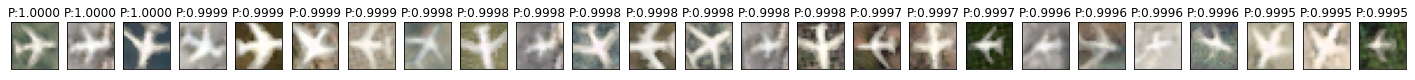

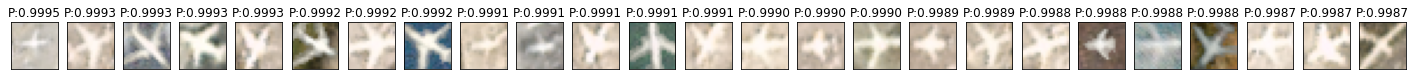

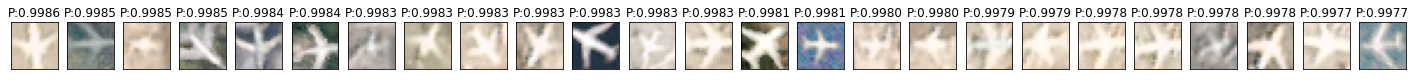

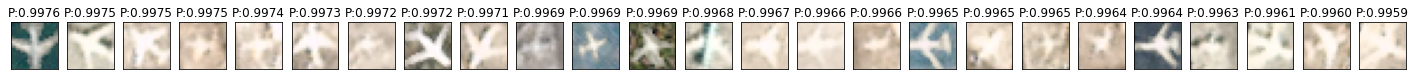

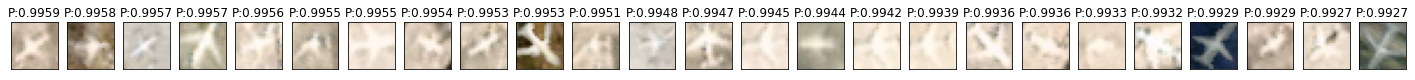

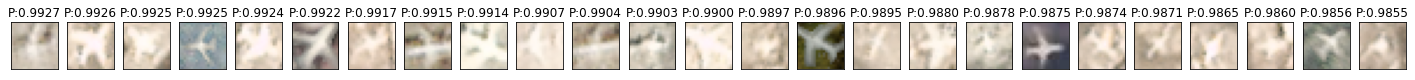

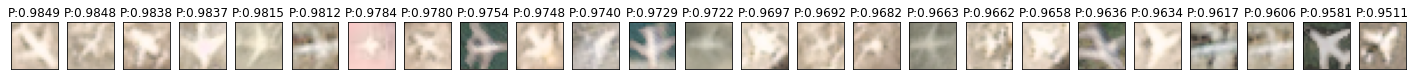

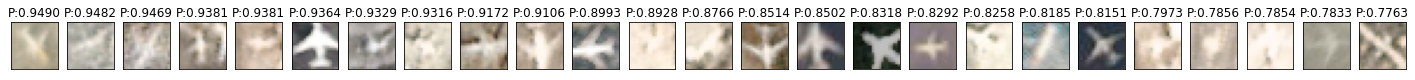

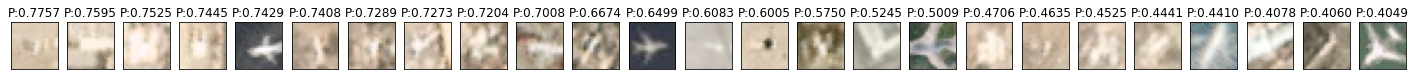

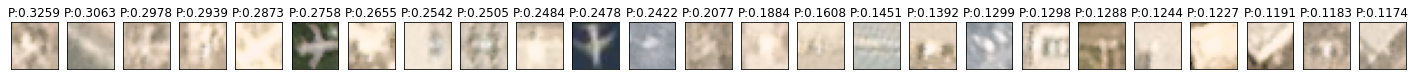

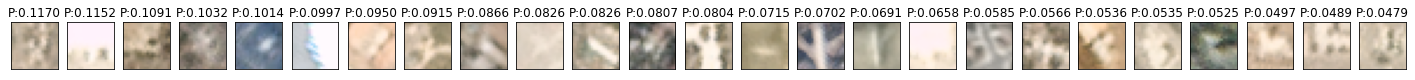

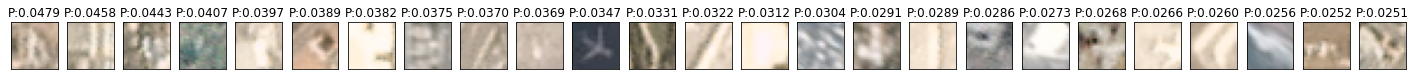

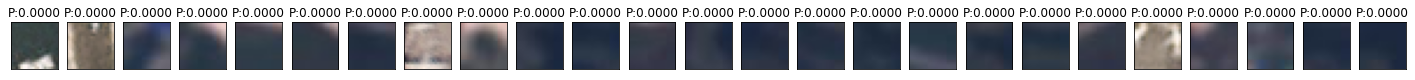

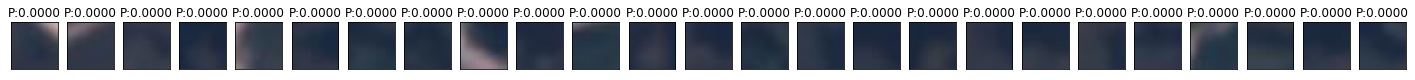

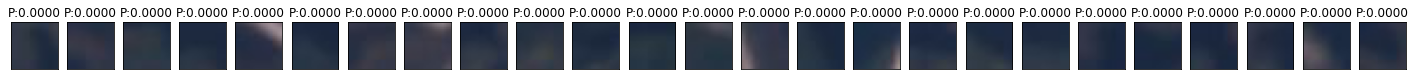

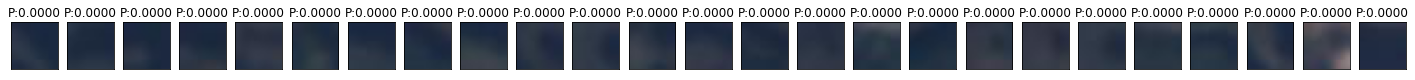

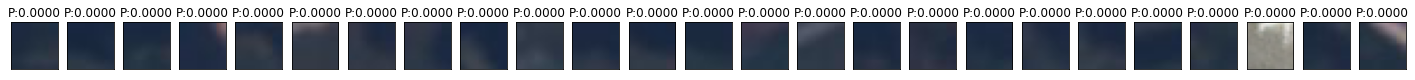

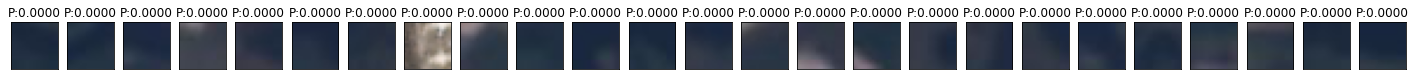

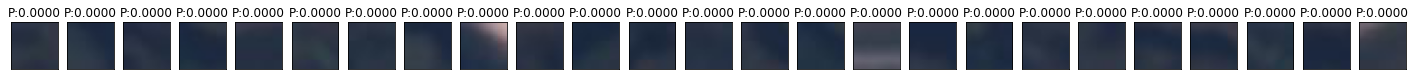

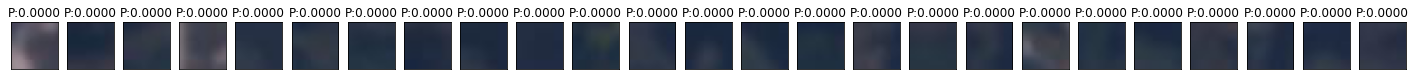

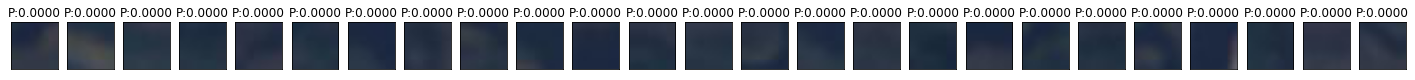

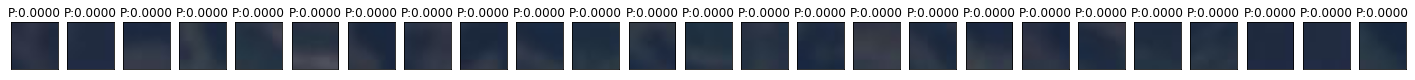

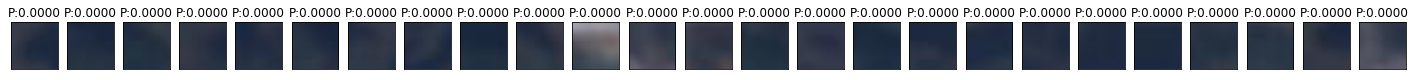

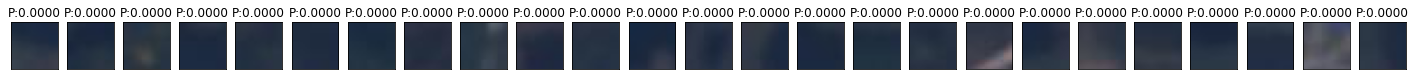

In [138]:
SIZE = 1
COLUMNS = 25
ROWS = 12

submission_sorted = submission[submission['sign'] > 0.0].sort_values(by='sign', ascending=False).reset_index()

for i in range(0,COLUMNS*ROWS,COLUMNS):
    fig, ax = plt.subplots(1,COLUMNS)
    fig.set_size_inches(COLUMNS*SIZE, SIZE)

    for j in range(COLUMNS):
        ax[j].set_xticks([])
        ax[j].set_yticks([])
        ax[j].set_title(f"P:{submission_sorted['sign'][i+j]:.4f}")
        try:
            ax[j].imshow(load_img(path+'avia-test-extended/'+submission_sorted['filename'][i+j]+'.png'))
        except:
            ax[j].imshow(load_img(path+'avia-test-extended/'+submission_sorted['filename'][i+j]+'.jpeg'))
    plt.show()


submission_sorted = submission_sorted.sort_values(by='sign').reset_index()

for i in range(0,COLUMNS*ROWS,COLUMNS):
    fig, ax = plt.subplots(1,COLUMNS)
    fig.set_size_inches(COLUMNS*SIZE, SIZE)

    for j in range(COLUMNS):
        ax[j].set_xticks([])
        ax[j].set_yticks([])
        ax[j].set_title(f"P:{submission_sorted['sign'][i+j]:.4f}")
        try:
            ax[j].imshow(load_img(path+'avia-test-extended/'+submission_sorted['filename'][i+j]+'.png'))
        except:
            ax[j].imshow(load_img(path+'avia-test-extended/'+submission_sorted['filename'][i+j]+'.jpeg'))
    plt.show()